In [ ]:
"""

[1.4] 帕累托分析
帕累托分析（贡献度分析） → 帕累托法则：20/80定律

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：
多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”
→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润

例如：
** 世界上大约80％的资源是由世界上15％的人口所耗尽的
** 世界财富的80％为25％的人所拥有；在一个国家的医疗体系中
** 20％的人口与20％的疾病，会消耗80％的医疗资源。

一个思路：通过二八原则，去寻找关键的那20%决定性因素！


"""

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A公司十个产品的销售额:
          sales
A  4300.628184
B  3862.013038
C  4380.483138
D  2872.045496
E  2088.489737
F  1864.411636
G  3485.823481
H  2086.458658
I  1801.968325
J  3515.370135
----------------------------------------------------------------------------------------
A公司产品销售额排行:
          sales
C  4380.483138
A  4300.628184
B  3862.013038
J  3515.370135
G  3485.823481
D  2872.045496
E  2088.489737
H  2086.458658
F  1864.411636
I  1801.968325
----------------------------------------------------------------------------------------
产品的累计占比:
 C    0.144773
A    0.286906
B    0.414543
J    0.530724
G    0.645929
D    0.740848
E    0.809872
H    0.878828
F    0.940446
I    1.000000
Name: sales, dtype: float64
----------------------------------------------------------------------------------------
累计占比大于0.8的第一个产品名称:
 E
累计占比大于0.8的第一个产品索引:
 6
----------------------------------------------------------------------------------------
A公司的核心产品为:
          sales
C  4380.483138
A  4300.628184
B  3862.

<Figure size 2000x800 with 0 Axes>

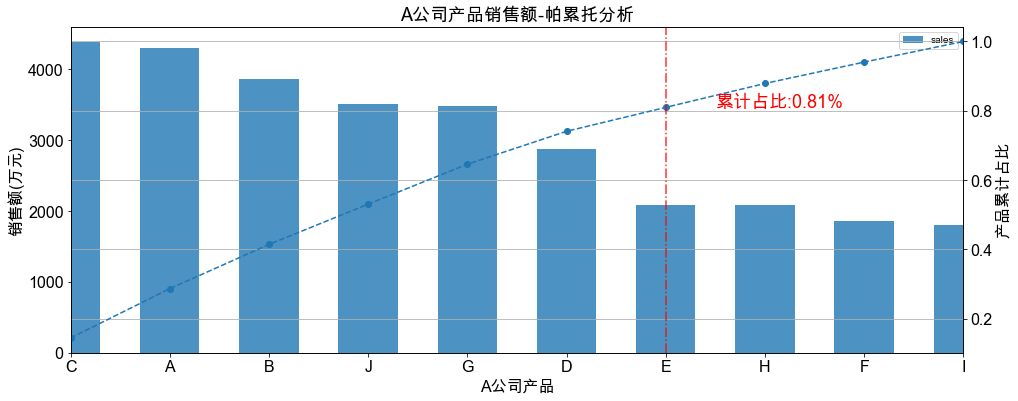

In [49]:
# 1.帕累托分析案例

# 创建数据，sales代表A公司十个产品的销售额
data = pd.DataFrame({"sales":np.random.randn(10) * 1200 + 3000}, index=list('ABCDEFGHIJ'))
print("A公司十个产品的销售额:\n", data)
print('-' * 88)

# 对数据进行从大到小的排序
data.sort_values(['sales'], ascending=False, inplace=True)
print("A公司产品销售额排行:\n", data)
print('-' * 88)
# 用柱状图显示销售额的排行
plt.figure(figsize=(20, 8), dpi=100)
data.plot(kind='bar', alpha=0.8, width=0.6, figsize=(16, 6), rot=0, fontsize=16)
plt.legend(fontsize=14)
plt.title("A公司产品销售额-帕累托分析", fontsize=18)
plt.ylabel("销售额(万元)", fontsize=16)
plt.xlabel("A公司产品", fontsize=16)

# 计算每个产品的累计占比
p = data['sales'].cumsum() / data['sales'].sum()
print('产品的累计占比:\n', p)
print('-' * 88)
# 用折线图显示产品的累计占比
p.plot(style='--o', secondary_y=True, fontsize=16)
plt.ylabel('产品累计占比', fontsize=16)

# 获取产品的累计占比大于0.8的值
key = p[p > 0.8].index.tolist()[0]
print('累计占比大于0.8的第一个产品名称:\n', key)
# 该产品的索引值
key_num = p.index.tolist().index(key)
print('累计占比大于0.8的第一个产品索引:\n', key_num)
print('-' * 88)
plt.axvline(key_num, linestyle='-.', color='r', alpha=0.8)
plt.text(key_num + 0.5, p[key], "累计占比:%.2f%%" % p[key], color='r', fontsize=18)
plt.grid()

# 输出A公司的核心产品
primary_product = data.loc[:key]
print("A公司的核心产品为:\n", primary_product)